# 1.0 IMPORTS

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings

## 1.1 Load data

In [130]:
# Plan 1 = Base de dados
# Plan 2 = Novas entradas

base_dados = pd.read_excel('data/BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

## 1.2 Visualize data

In [131]:
# 1 = Não usou
# 2 = Serviço
# 3 = Furto

base_dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [132]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    499 non-null    int64
 1   Idade         499 non-null    int64
 2   Preço Seguro  499 non-null    int64
 3   CEP           499 non-null    int64
 4   Serviço       499 non-null    int64
dtypes: int64(5)
memory usage: 19.6 KB


In [133]:
base_dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,49.541082,1935.827655,19024.793587,1.901804
std,144.193157,18.185121,1401.582991,15.088610,0.857507
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.500000,33.500000,611.000000,19011.000000,1.000000
50%,250.000000,51.000000,1661.000000,19025.000000,2.000000
75%,374.500000,65.000000,3322.000000,19038.000000,3.000000
max,499.000000,80.000000,3998.000000,19050.000000,3.000000


# 2.0 VIEW CHARTS

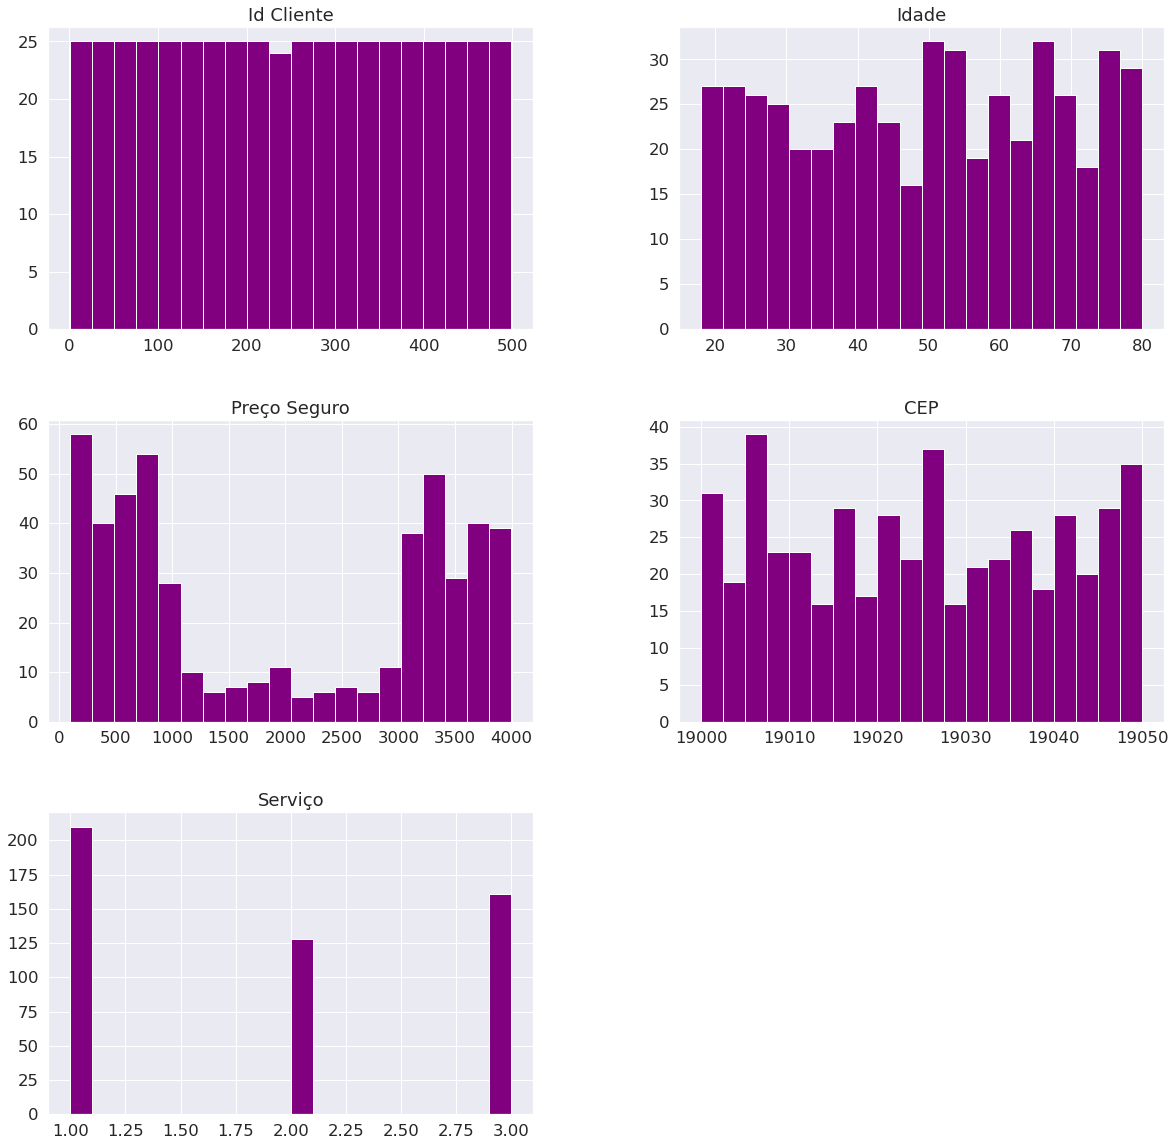

In [134]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = base_dados.hist(bins=20, color='purple')

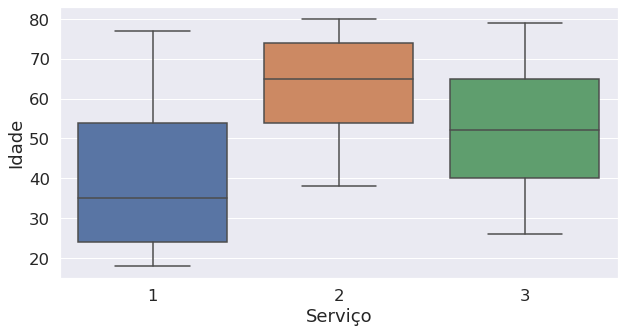

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Serviço', y='Idade');

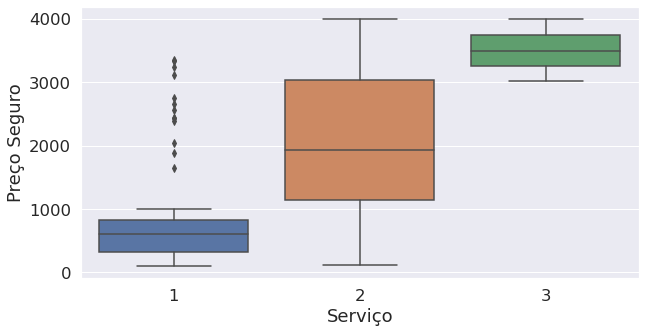

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Serviço', y='Preço Seguro');

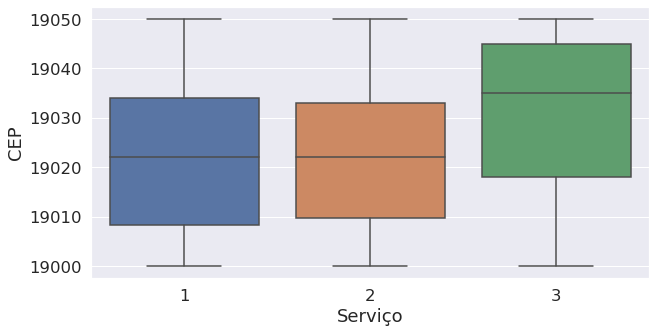

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='Serviço', y='CEP');

# 3.0 TRAINING AND TESTING

In [138]:
# transformar tabela em array (values)
caracteristicas = base_dados.iloc[:, 1:4].values
previsor = base_dados.iloc[:, 4:5].values

In [139]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    caracteristicas, 
    previsor, 
    test_size=0.30, 
    random_state=10
)

print(len(base_dados))
print(len(x_treinamento))
print(len(x_teste))

499
349
150


In [140]:
algoritmo_floresta_aleatoria = RandomForestClassifier(n_estimators=500)

# treinar modelo
algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)

<ipython-input-140-28b456be07ba>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)


RandomForestClassifier(n_estimators=500)

[[63  4  1]
 [ 5 27  8]
 [ 0  0 42]]


O zero é que nunca usou o seguro.
O um é que usou algum serviço.
O dois é que sofreu algum furto.


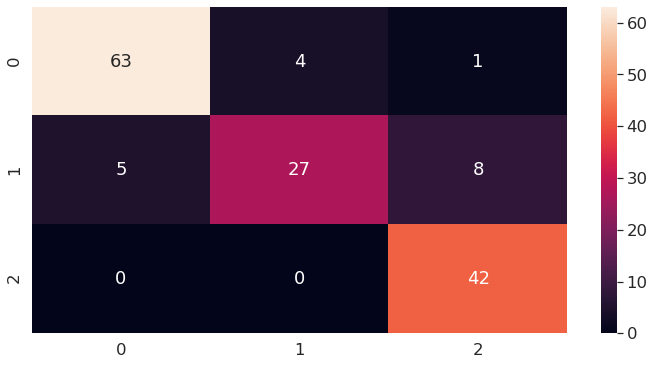

In [141]:
# previsão de valores
previsoes = algoritmo_floresta_aleatoria.predict(x_teste)

# matriz de confusão
matriz_confusao = confusion_matrix(y_teste, previsoes)
print(matriz_confusao)

print('\n')
print('O zero é que nunca usou o seguro.')
print('O um é que usou algum serviço.')
print('O dois é que sofreu algum furto.')
plt.figure(figsize=(12,6))
sns.heatmap(matriz_confusao, annot=True);

In [142]:
# acurácia do modelo
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        68
           2       0.87      0.68      0.76        40
           3       0.82      1.00      0.90        42

    accuracy                           0.88       150
   macro avg       0.87      0.87      0.86       150
weighted avg       0.88      0.88      0.88       150



# 4.0 PREDICTIONS

In [143]:
novas_vendas = pd.read_excel('data/BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')
novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [144]:
prever = novas_vendas.iloc[:, 1:4].values

novas_vendas['Previsao do Modelo'] = algoritmo_floresta_aleatoria.predict(prever)

In [145]:
novas_vendas['Previsao do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsao do Modelo, dtype: int64